# **BINARY CLASSIFICATION FOR BREAST CANCER USING K-NEAREST NEIGHBOUR ALGORITHM**

## **INTRODUCTION**

In recent times, breast cancer has become the most common form of cancer in women. In 2012, it was estimated that about 1.67 million new cases of cancer came to light and accounted for about 25% of all cancer case that year. Breast cancer is common in regions of developed or developing countries and it starts when cells located in the breast begin to grow out of proportion commonly known as Tumor. Tumor doesn't always mean cancer but can be classified as malignant(cancerous) meaning that the cell is infected and dangerous which can lead to cancer or benign(non-cancerous) meaning that the cell is safe and doesn't have any systom is being infected or leading to cancer.

The true cause of breast cancer hasn't been specified but there are several factors that has been attributed to this condition such as family history, age, sex, genetic properties, history of previous breast cancer, and recurring breast disease which are non-modifiable risk factors. Modifiable risk factors can be radiation exposure, hormone replacement therapy,menstrual and reproductive,  alcohol, and even high-fat diet.



In recent times, there have been developments in science making it possible to gauge tumor stages and identify the right treatment. This project aims to implement machine learning algorithms like the K-Nearest Neighbour Classifier to predict if a tumor will be classified as malignant(cancerous) or benign(non-cancerous). It would cover specific steps to solving a binary classification problem of this instance. There are also several algorithms and evaluation metrics used to measure the sucess of this machine learning model.

## **DATASET**

The dataset used for this project is gotten from [Kaggle "Breast Cancer Dataset: Binary Classification Prediction for type of Breast Cancer"](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) which was originally sourced from  Wisconsin Hosipital by imaging a needle-tip-wide breast mass with biosip by Dr. William Wolberg who was an employee at the hospital, which images was then digitized these images by William Nick Street, a researcher of the University of Wisconsin Computer Sciences Department, in November 1995 [(Walid Theib Mohammad et al. 2022)](https://www.hindawi.com/journals/abb/2022/6187275/).

In [ ]:
# Using google colab, we would need to mount our drive on here
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


## **PREIMINARTY ANALYSIS**
### Exploratory Data Analysis

Here, the relevant libraries needed for this project is imported as well as the dataset. Exploring the dataset is also important to improve the quality of the data by checking for null values, outliers and giving a summary statistics of our dataset.




In [ ]:
# Importing libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

# Import the cancer dataset
df = pd.read_csv("/content/drive/MyDrive/Customer_Transaction_Prediction/BCancer.csv")

#Now lets get the shape of the dataset
print(f'The dataset contains {df.shape[0]} observation and {df.shape[1]} features')

#Lets look at the top 5 rows of our dataset
df.head()


The dataset contains 569 observation and 33 features


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Considering the attibute in this dataset, notice the data set contains a set of features and a target class '***diagnosis***' which is used to determine in what situation based on the attributes given that a tumor is said to be cancerous or not, M- malignant(cancerous) or B-benign(non-cancerous).

The features given in the dataset are described as:

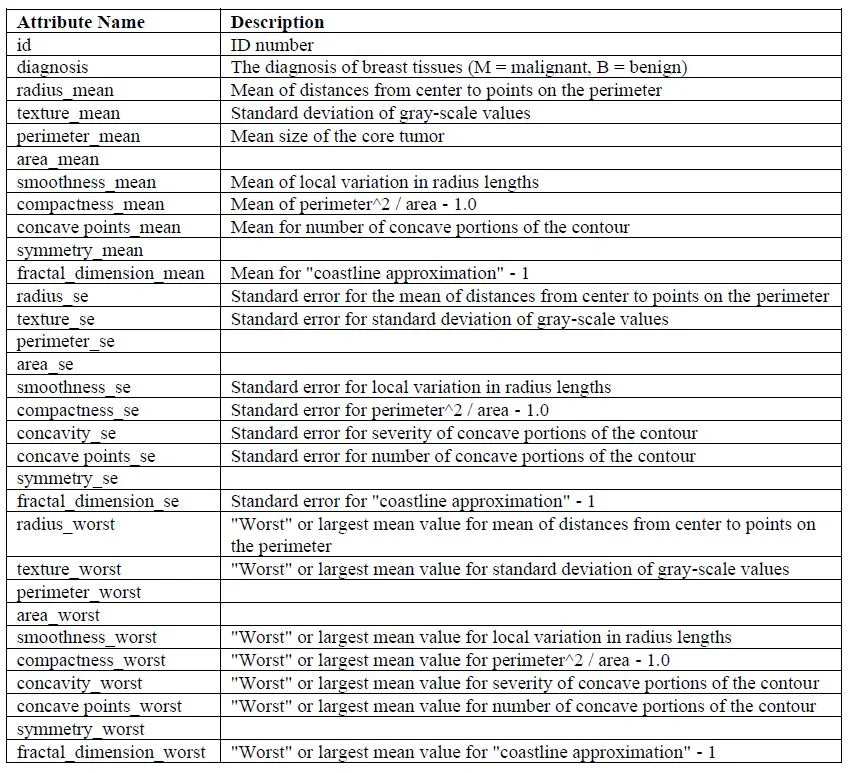




In [3]:
# Getting an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Checking for null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The dataset has a column called Unnamed:32 that has only null values, which is expected as most real world data has null values, however, machine learning models cannot handle null/NaN values, therefore would drop it with every other null value present. The dataset only needs to contain features that are relevant to the target class and the id column is assumed to be just a label for each feature and therefore will be irrelevant to our prediction, so dropping it as well.

In [5]:
#  Dropping all null values
df.dropna(axis=1, inplace=True)

# Dropping the id column because it doesn't seem relevant
df.drop(['id'], axis =1, inplace=True)

In [6]:
#Getting the summary statistics of our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Notice that the features are divided into three groups, the mean, se and worst. Under each group, the area and perimeter have way larger values than the rest of the features, therefore plotting all the feature into one graph may not look pleasant to look at when checking for outliers. Also notice the difference between the mean and median which means that there may be some level of skewness in our dataset. To be sure of this I will plot a histogram to check the data distribution for each feature, this will show the type of skewness the cancer data has. 

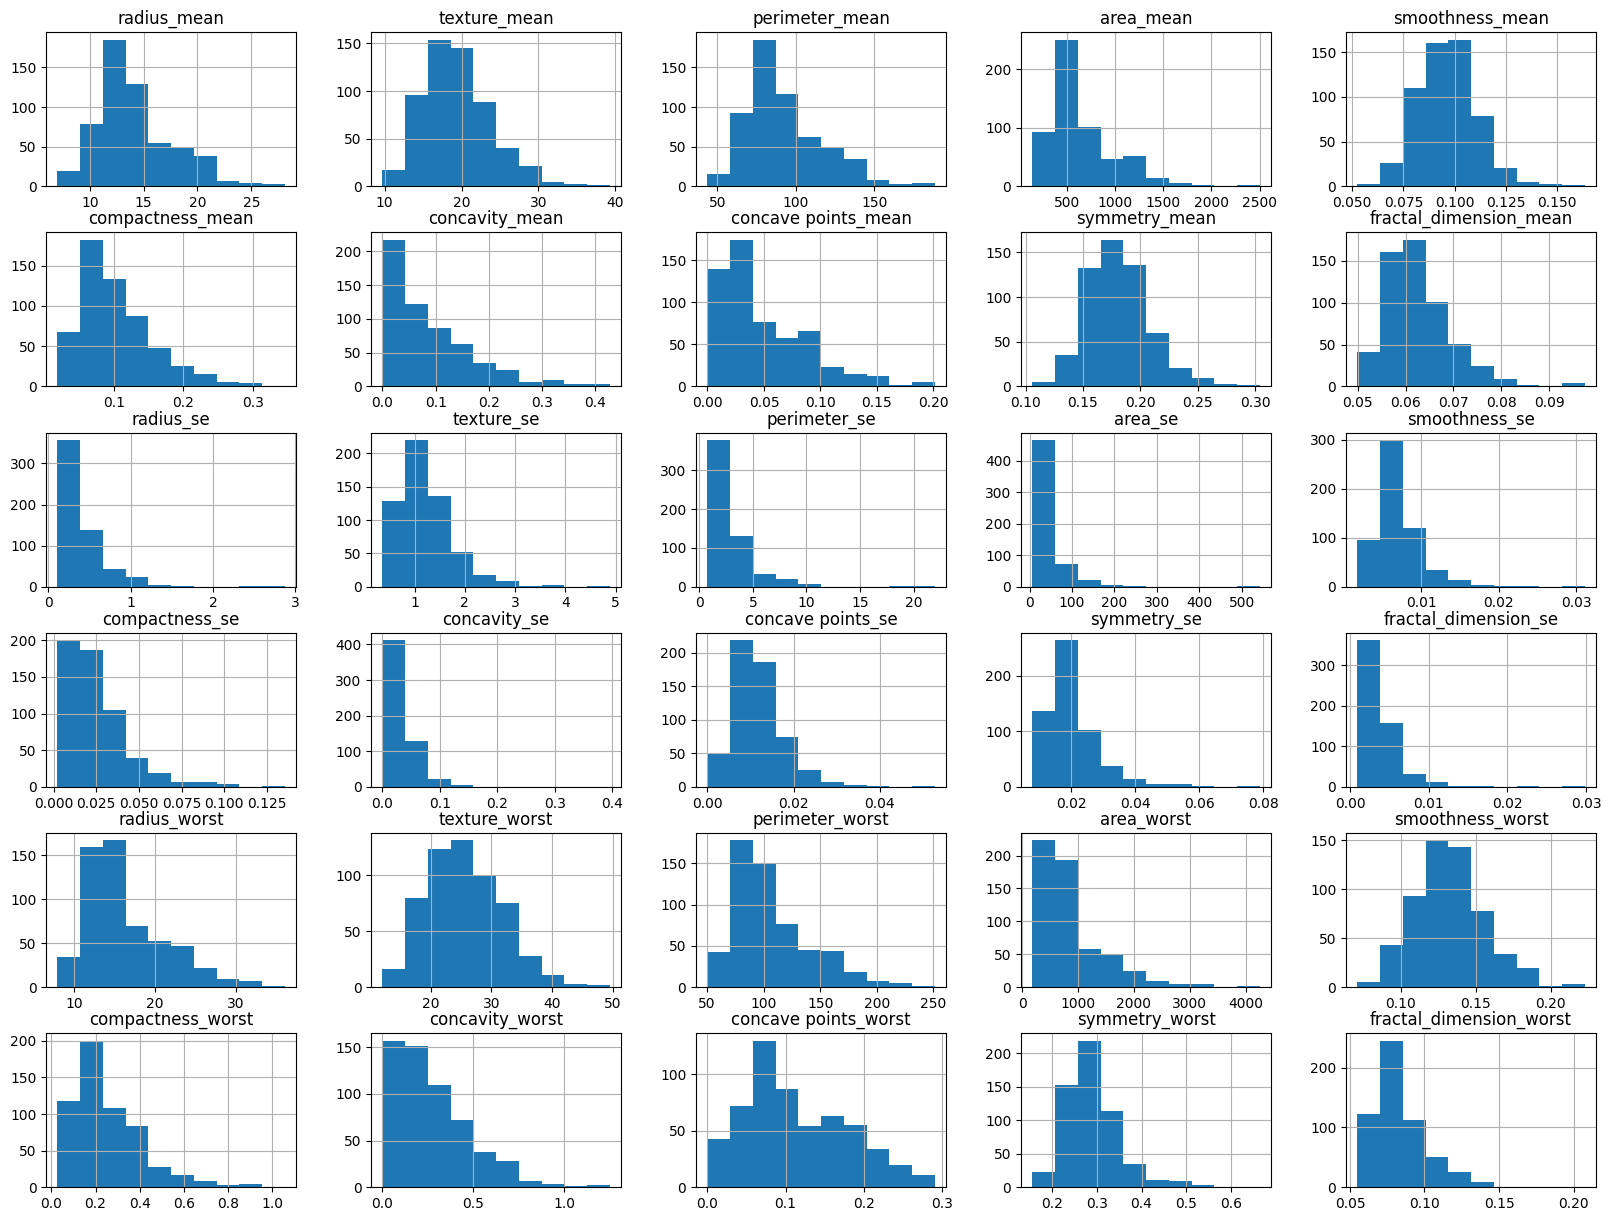

In [7]:
#Plotting a histogram to get the distribution of our dataset
df.hist(figsize=(20,15))
plt.show()

From the plot, it shows the data is right(positive) skewed meaning that most of the values are compact to the left of the distibution which shows that there may be extreme values like outliers in the data.

It is also important to check for the data balance which will help in selecting the best methods used for the project.

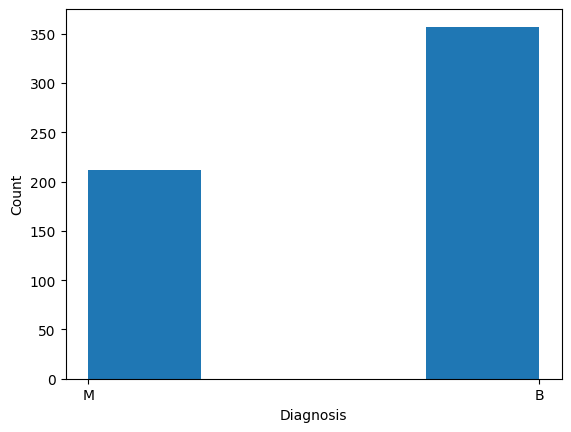

Number of Malignant=  212
Number of Benign=  357


In [8]:
# Counting the categorical values in our dataset
plt.hist(df['diagnosis'], bins=4)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()
B,M = df['diagnosis'].value_counts(sort=True)
print('Number of Malignant= ',M)
print('Number of Benign= ',B)

The plot shows the frequencies of the breast cancer and shows that the data is imbalanced and this affects machine learning algorithms from learning properly as it may tend to learn one class better that the other. The malignant class (M) has 212 observations while the benign class has 357 observations.

#### Checking for Outliers
A proper way to check for outliers is by using boxplots, this will show some features having very high and very low values. As the some features have very high values i.e. some attributes contain higher values than the others as we saw earlier,  it would be wise to split the data into two , high_columns and low_columns, then plot them seperately to properly show the outliers in the breast cancer data.

In [9]:
# Removing the features with very high values to enable us plot our graph better
high_columns = df.columns.drop(['radius_mean','texture_mean','perimeter_mean','area_mean','radius_se','texture_se','perimeter_se','area_se','radius_worst','texture_worst','perimeter_worst',
 'area_worst'])
low_columns = df.columns.drop(['diagnosis', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

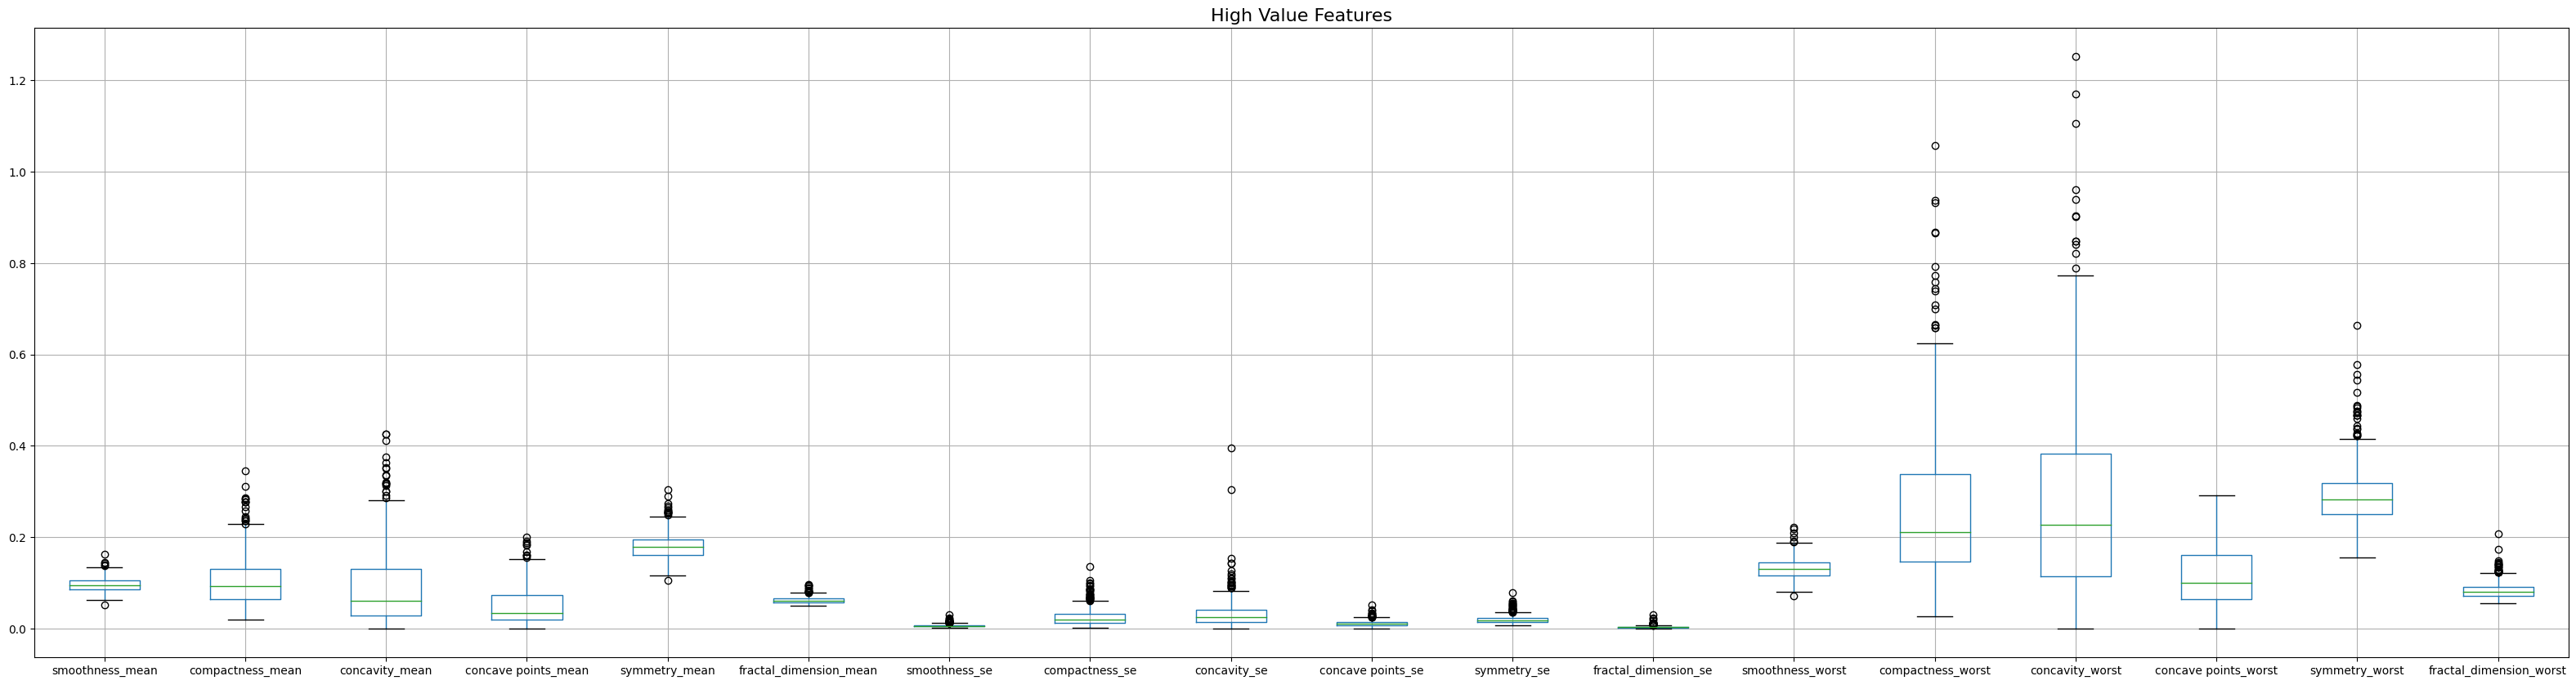

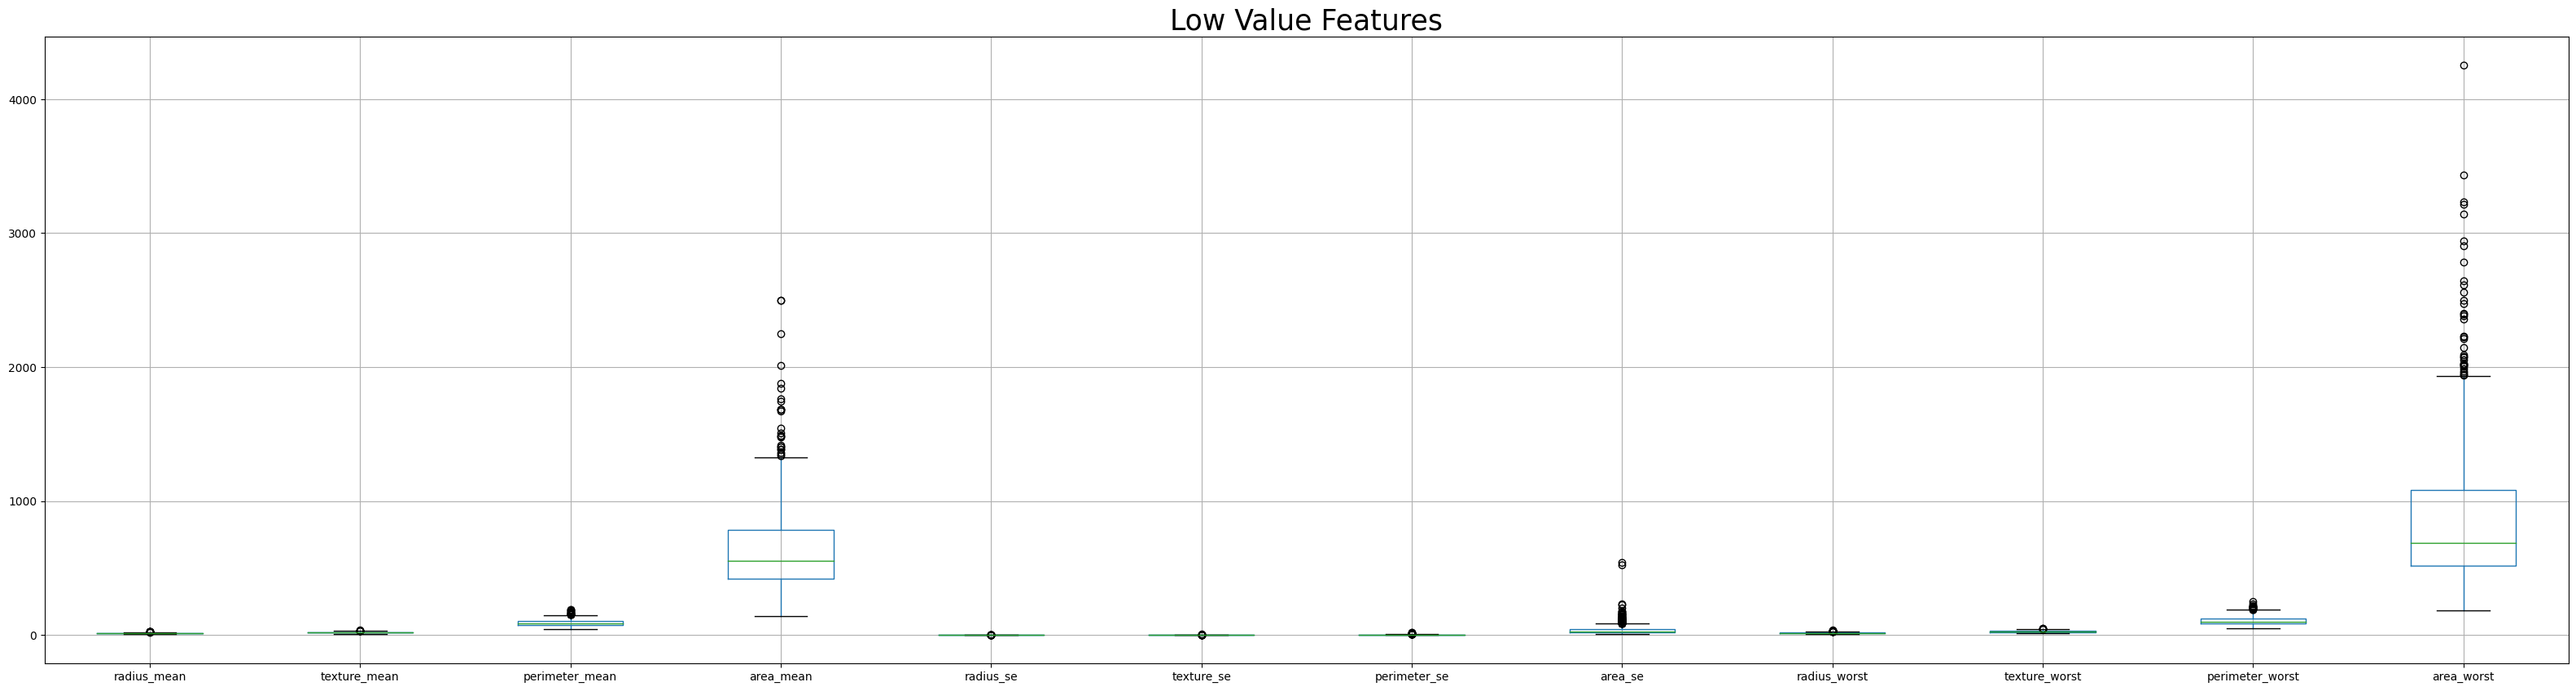

In [10]:
#High_column value plot
df[high_columns].boxplot(figsize=(40,10))
plt.title('High Value Features', fontdict= {'fontsize':16})
plt.show()

#Low_column value plot
df[low_columns].boxplot(figsize=(40,10))
plt.title('Low Value Features', fontdict= {'fontsize':25})
plt.show()

See that most of the features have extreme values which can affect the model, so handling this is important.


### Data Preprocessing
It is important to preprocess the data and prepare it for training and testing. Machine learning models work well with numerical data meaning that target class which is categorical (the target class, Diagnosis) needs to be converted into numerical datatype, because it currently an object datatype.

Diagnosis is given as M and B, so I'll change this to 0 for B and 1 for M.

In [11]:
# Convert categorical data to numerical
df['diagnosis'] = df['diagnosis'].replace(["M", "B"], [1, 0])
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

###Checking for Correlation
It is important to see how each feature readily contributes to the outcome is breast cancer, if they have little to no effect to the outcome or they have very high effect to the the outcome of breast cancer. A good way to show this is by using a correlation heatmap. The Correlation Heatmap is a powerful way to easily see how highly related each feature are to each other, it also calculates the coefficient correlation between each pair feature.

Text(0.5, 1.0, 'Correlation Map')

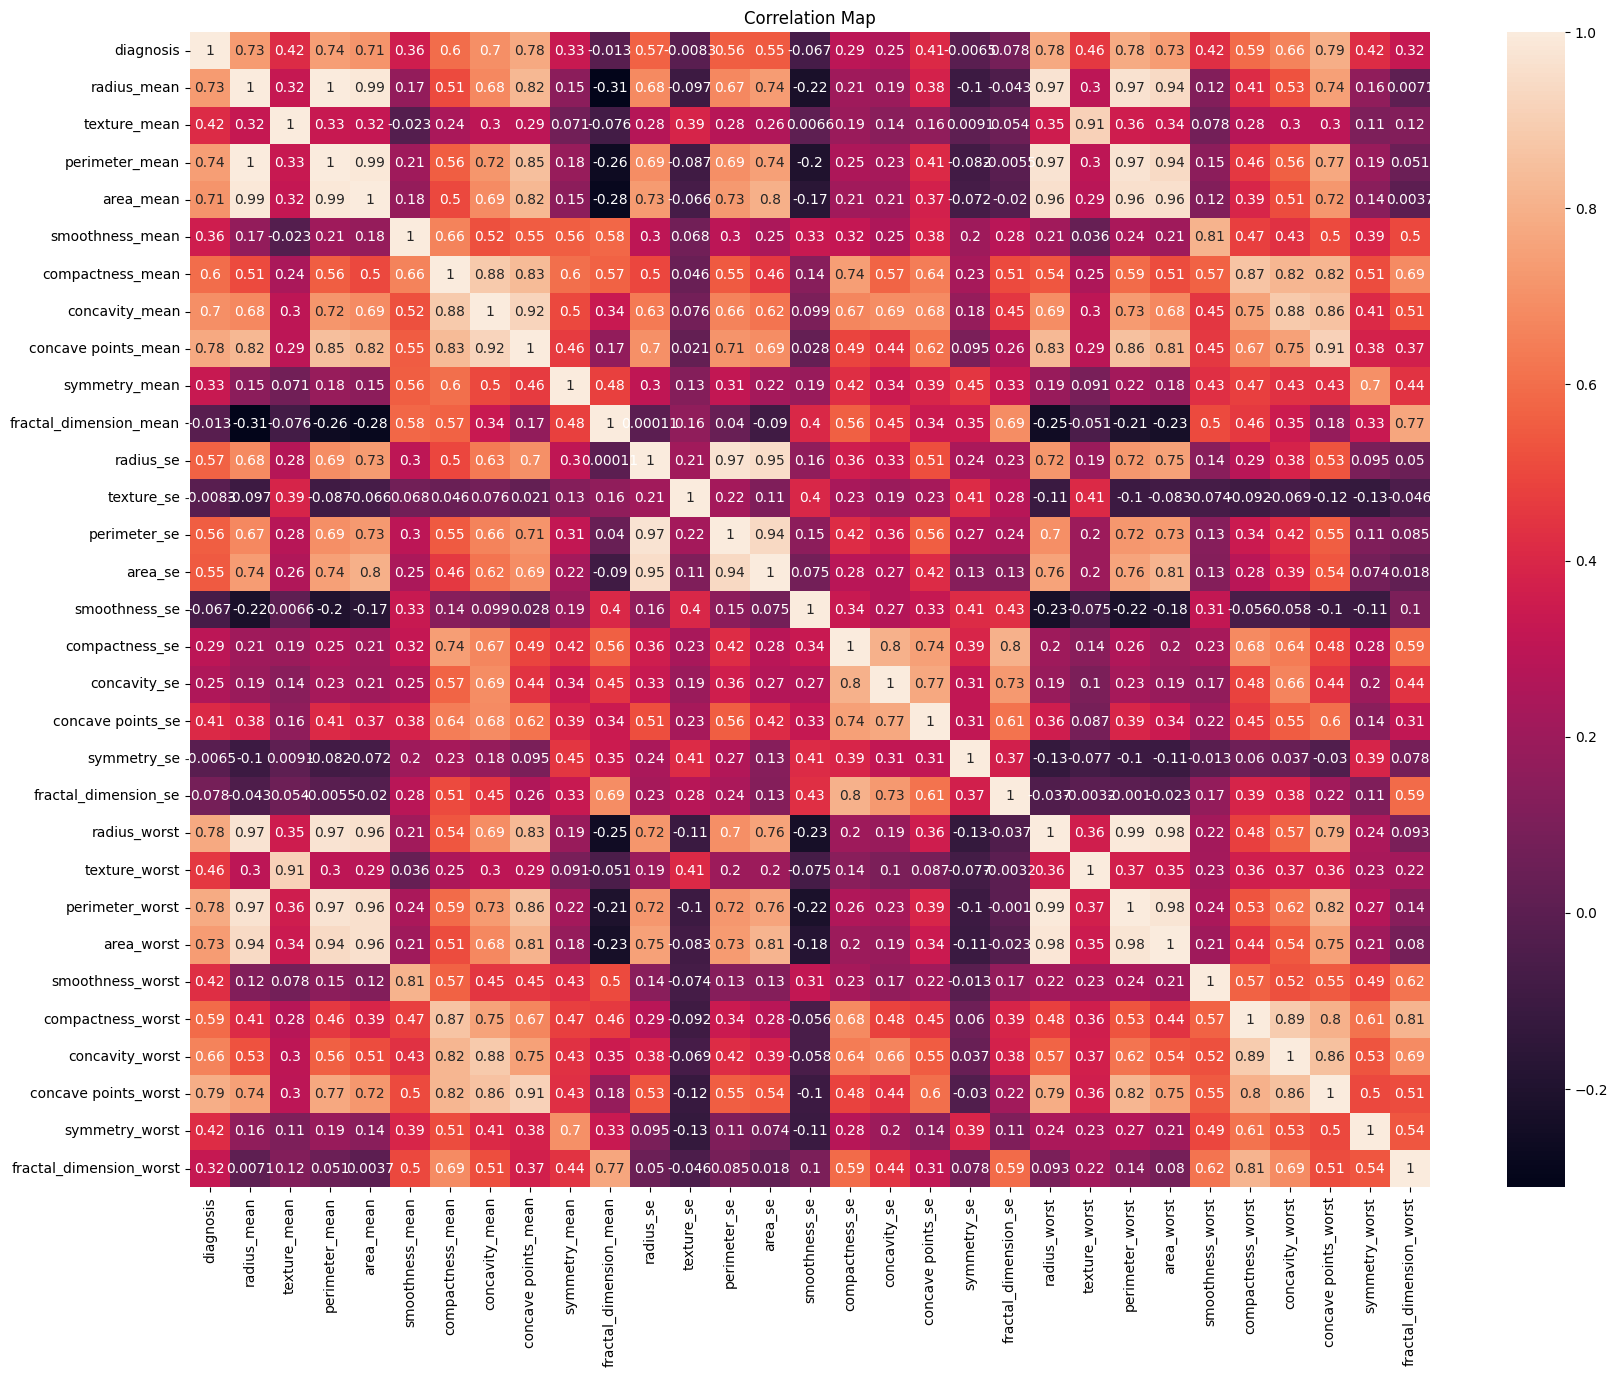

In [12]:
# Checkiing for feature correlation
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot= True)
plt.title('Correlation Map')

From the heatmap plot, it can be interpreted in two ways;



*   Firstly, for feature similarities, a number of features have a
coeffiecient correlation of 0.99 whic is very high, e.g. the radius_mean, area_mean and perimeter mean seem to be highly correlated to each other, the radius_worst, perimeter_worst and area_worst area also correlated, the radius_se, perimeter_se and area_se are also correlated, the compactness_worst, concavity_worsst, concave points_worst and fractal_dimension_worst are also correlated.

*   Secondly, in relation to the target class, some feature have very weak correlation of to the target class (***diagnosis***). For example, texture_se has a coeffiecient correlation of -0.0083 which is considered very weak.



Feature selection on our dataset from any of the cases listed above will be implemented later on and to examine how the model will perform with fewer features, but first I'll train the model using all 30 features and see how it performs.

Before I go any further, I will get the probability of having cancer without considering the features to give an idea of how well our model needs to perform for us to consider it accurate.

In [13]:
#Finding the proobability of having cancer and its accuracy
cancer_prob = sum(df.diagnosis) / len(df)
print(f'Probability of having cancer is: {np.round(cancer_prob,2)*100}%')
print(f'Probability accuracy is: {np.round(1-cancer_prob,2)*100}%')

Probability of having cancer is: 37.0%
Probability accuracy is: 63.0%


There is a 37% probability that a tumor is cancerous and can be 63% accurate. Our model needs to beat this accuracy!

### Splitting our dataset into feature and target



The data will be split into feature and target. X being the feature and y being the target.

In [14]:
# Splitting our data into feature and target
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

# print(X.head())
# print(y.head())
print(f'Our feature X has {X.shape[0]} rows and {X.shape[1]} columns, while our target y has {y.shape} entries.')

Our feature X has 569 rows and 30 columns, while our target y has (569,) entries.


### Handling Outliers By Normalization


Managing the outliers in the dataset is very important in other to get more accurate predictions. This can be done by normalizing the data using the Standard Scaler library, this will put all the dtaset within a range of values.

In [15]:
# Scaling our data to handle outliers using StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(scaled_X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


## **METHOD**
For this project, the following methods were considered to achieving the best prediction possible in predicting if a tumor is cancerous or not.


*   **Train Test Split** : The train test split divides our dataset into two, one for training and the other for testing. This is most common way to building a machine learning model. This might not give the right accuracy score due to dataset being imbalanced but just to see how well the model is able to learn with this kind of dataset.
*   **K-Fold Cross Validation** : This method handles imbalanced dataset such that it divides the dataset into k-folds and shares the test data amoung each fold equally making our model have sufficient amount of each class that it doesn't learn from one class more than the other. It trains the model while also validating and testing. Handling imbalanced data is very important in machine learning to avoid our model from learning from one class better than the other. To predict our imbalanced dataset properly, I will use the cross validation method for a proper accuracy score. 

*   **Feature Selection** : This method takes into consideration the correlation of the features in the data to the target class. Feature selection will be introduced based on feature importance i.e excluding features that have a weak correlation to the target variable, then I will train our model on this reduced dimension and compare the outcome.







###  TRAIN_TEST_SPLIT
Here, I'll split the data into training and testing set. 20% of the dataset will used for testing while 80% will be used for training. The size choosen for train and test was just a random selection and didn't consider any criteria in my selection.

The scaled_X is split into X_train for training and X_test for testing/prediction and the y is split into y_train for training and y_test to compare the predicted outcome with would the original. I would set the random state to 25, and using the stratify sampling, setting it to y, this is so that our dataset is split in respect to the distribution of y which is our target class.

In [16]:
# Splitting our dataset into training (X) and testing (y)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 25, stratify=y)

#Splitting the data without specifying stratify
#X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2)

# Checking for the size of each data split
X_train.shape, X_test.shape

((455, 30), (114, 30))

### Model Selection and Training

For this model, I will be using the K-Nearest Neighbour. Reasons why this algorithm was choosen is because;



1.   Knn works well with smaller datasets.
2.   It performs well with well-labelled data which our dataset is.
3.   It is ideal for non-linear data, as our data is noise free and has no underlying assumptions

At this stage I will train the KNN algorithm on the train dataset and also tune the hyperparameter (k) until an optimal score is obtained.

In [17]:
# The knn classifier has already been imported at the start of this notebook
# Now we have to instantiate the classifier and assign to a variable knn.

knn = KNeighborsClassifier(n_neighbors=3)

# Using the 'fit' method to train our model. This is where we train our model on our training set
knn.fit(X_train,y_train)

# We then check the training accuracy. 
score = knn.score(X_train,y_train) 
print("***********************************")
print(f'Training Accuracy: {round(score*100,1)}%')

***********************************
Training Accuracy: 97.6%


To obtain an optimal score, hyperparameter tuning (k) was done until we got an optimal score of 97.6% at k=3

### Model Testing
After training our model, I will make predictions using the test set and compare the predicted values y_pred to the actual values y_test. This will show how well the model is being trained. The testing result shows the true performance of the models ability not the training result.
Mathematically, we can say that f(x) = y, with x being the features of our testing set and y being the predicted target.
y is given as y_pred and x is given as X_test, f is the model which in this case it is knn.


I will print out the classification report to show how well the knn model performed using the following evaluation metrixs; F1- Score, Precision, Recall and Support.

In [18]:
# We are predicting the target class using our test set.
y_pred = knn.predict(X_test)

# We print out the first 10 prediction to see is it predicted correctly i.e. predicted values and actual values
print(f'Predicted values:{y_pred[0:21]} \n Actual values:  {y_test[0:21].values}')

#Print out the classification report
print(classification_report(y_test, y_pred))

Predicted values:[0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0] 
 Actual values:  [0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Our model made 114 predictons, out of the prediction, our model was able to give the following;


Precision is 100% for ***malignant*** ( 100% of the cancerous tumor predicted are actually cancerous).

Recall is 95% for M for ***malignant*** (predicted 95% of the cancerous tumor as cancerous).

F1- Score is 98%

Our accuracy is at 98%





Let's use a confusion matrix to see how well each instances of malignant and benign tumors were correctly predicted.

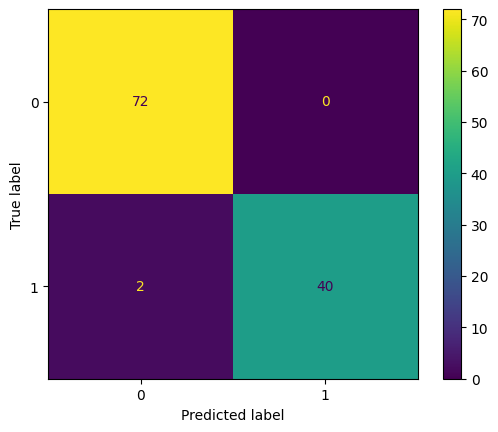

In [19]:
# Plotting the confusion matrix for our model
cm = confusion_matrix(y_test,y_pred)
plt.figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

As observed in the matrix above, the model predicted that 72 instances of the malignant tumor (1) actually were malignant and 40 instances of the benign tumor are actually benign.

### K-FOLD CROSS VALIDATION 

The K-fold cross validation uses all the dataset scaled_X, hence would take the mean score of the testing across all folds.


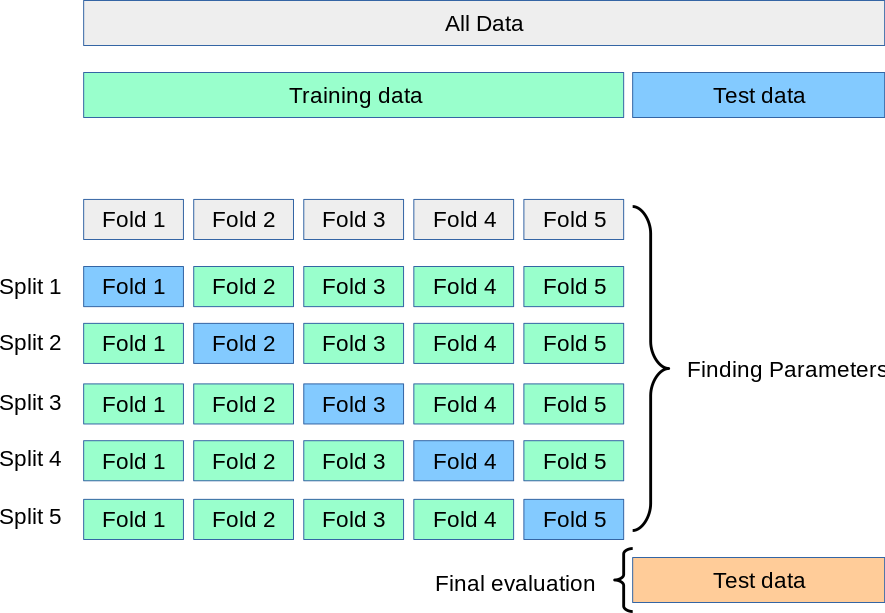

In [20]:
# Cross-validate the model
cv_results = cross_validate(knn, scaled_X, y, cv=10, return_train_score=True, scoring=['accuracy'])

# Print the results
print("Mean Training score:", round(cv_results['train_accuracy'].mean()*100,2),'%')
print("Mean Testing score:", round(cv_results['test_accuracy'].mean()*100,2),'%')


Mean Training score: 98.09 %
Mean Testing score: 96.48 %


Here, I'll plot the training and testing accuracy to see if there is overfitting.

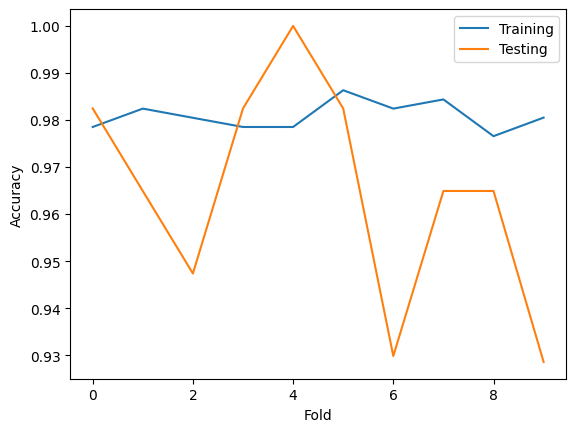

In [21]:
# Plot the results
plt.plot(cv_results['train_accuracy'], label='Training')
plt.plot(cv_results['test_accuracy'], label='Testing')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph shows the training and testing accuarcy for each fold during the cross validation process. From fold to fold the model performed okay for both the set as expected and no sign of overfitting or underfitting

### FEATURE SELECTION

To perform feature selection I will be making use of Correlation Matrix.

Calculating the correlation coefficients between each pair of our feature, this allows to select the most highly correlated features.

In [22]:
corr_matrix = df.corr()

# Select the most highly correlated features
top_features = corr_matrix.index[abs(corr_matrix['diagnosis']) > 0.4]



The above code filters out all features in the dataset whose absolute correlation (positive or negetive) with the target variable is less than 0.5. If the absolute correlation coefficient value between a feature and the target variable is less than 0.4, consider that feature to have a weak correlation.

In [23]:
len(top_features)

21

In [24]:
top_features

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')

Introducing cross validation to the top features

In [25]:
# Splitting our data into feature and target
X = df[top_features]
X = X.drop(['diagnosis'],axis=1)
y = df['diagnosis']

# print(X.head())
# print(y.head())
print(X.shape, y.shape)

(569, 20) (569,)


In [26]:
# Scaling our data to handle outliers
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.10952635,
         2.29607613,  2.75062224],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.14674897,
         1.0870843 , -0.24388967],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  0.85497394,
         1.95500035,  1.152255  ],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.3267666 ,
         0.41406869, -1.10454895],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  3.19760468,
         2.28998549,  1.91908301],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.30583065,
        -1.74506282, -0.04813821]])

In [27]:
# Cross-validate the model
cv_results = cross_validate(knn, scaled_X, y, cv=10, return_train_score=True, scoring=['accuracy'])

# Print the results
print("Mean Training score:", cv_results['train_accuracy'].mean())
print("Mean Testing score:", cv_results['test_accuracy'].mean())


Mean Training score: 0.984963602582846
Mean Testing score: 0.963032581453634


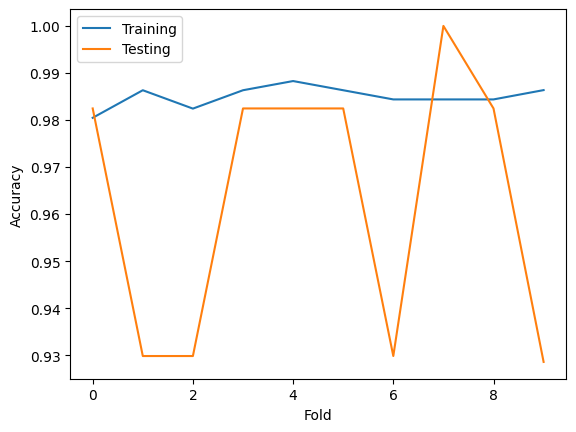

In [28]:
# Plot the results
plt.plot(cv_results['train_accuracy'], label='Training')
plt.plot(cv_results['test_accuracy'], label='Testing')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **RESULTS**


Here is the summary output of the three methods used in this project.

Train_test_split gave an accuracy score for training at 97.6% and an accuracy of 98% for testing which is good and shows that the model learnt well from the training set and was able to implement what was learnt on the test set. Specifying the stratify parameter enabled the model to learn better.

K-Fold Cross Validatioin gave a mean training score of 98.09% and a mean testing score of 96.48%. After plotting each training and testing scores, it showed that there was no sign of overfitting and underfitting.


Feature Selection with cross validation gave a mean training score of 98.49% and a mean testing score of 96.30% with no sign of overfitting and underfitting

## **CONCLUSION**

In this project, I compared three methods to see how each one would perform for the problem of an imbalanced dataset.
The train test split showed that our model performed well without specifying the stratify parameter but found that althought the accuracy was high, our model had a problem of predicting the benign class better than the malignant but after specifying the stratify parameter when splitting our data there was a better outcome. However, the cross validation approach was considered since it has been tested to work well with imbalanced dataset, and it showed a good outcome with no sign of overfitting or underfitting. I went further to experiment using feature selection but noticed that there wasn't so much different in score among the three methods. Therefore, any of these methods will work well with the kind of problem being solved.